***AUTO-MOTOR DATA ANALYSIS***

The data analysis done here is for autos and motors data. This will be used to create models later on. First, we will import the necessary libraries and the data.
Thereafter, we will do some data cleaning and data analysis to understand the data better.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's import the data and take a look at the first few rows of the data.

In [2]:
#import of the data
data = pd.read_csv('autos.csv', encoding='latin1')

# Display the first few rows of the data
data.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [3]:
# Checking the shape of the data
data.shape

(50000, 20)

The data is so huge, we have a total of 20 columns and over 371528 rows. We will need to do some data cleaning and data analysis to understand the data better.

***DATA CLEANING***

We will start by checking for missing values in the data.

In [4]:
# Checking for missing values
data.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

We have missing values in the columns 'vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage'. We will fill these missing values with the mode of the respective 
columns, if the data type is categorical. If the data type is numerical, we will fill the missing values with the mean of the respective columns. 

In [5]:
# Filling the missing values
data['vehicleType'].fillna(data['vehicleType'].mode()[0], inplace=True)
data['gearbox'].fillna(data['gearbox'].mode()[0], inplace=True)
data['model'].fillna(data['model'].mode()[0], inplace=True)
data['fuelType'].fillna(data['fuelType'].mode()[0], inplace=True)
data['notRepairedDamage'].fillna(data['notRepairedDamage'].mode()[0], inplace=True)

# Checking for missing values
data.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
odometer               0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [6]:
# Checking the data types of the columns
data.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
odometer               object
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [7]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We will convert the 'dateCrawled', 'dateCreated', 'lastSeen' columns to datetime data type.

In [8]:
# Converting the 'dateCrawled', 'dateCreated', 'lastSeen' columns to datetime data type
data['dateCrawled'] = pd.to_datetime(data['dateCrawled'])
data['dateCreated'] = pd.to_datetime(data['dateCreated'])
data['lastSeen'] = pd.to_datetime(data['lastSeen'])

# Checking the data types of the columns
data.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                          object
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
odometer                       object
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

We will now check for duplicate rows in the data and drop them.

In [9]:
# Checking for duplicate rows
data.duplicated().sum()

0

We have no duplicates in the data. Now we check on possible outliers in the data.

In [10]:
# Checking for outliers
data.describe()


,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


Using price column first, we will check for outliers using the boxplot. But before we start, we will have to remove '$'and convert the data type to float from object.

/tmp/ipykernel_24174/2962067569.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)


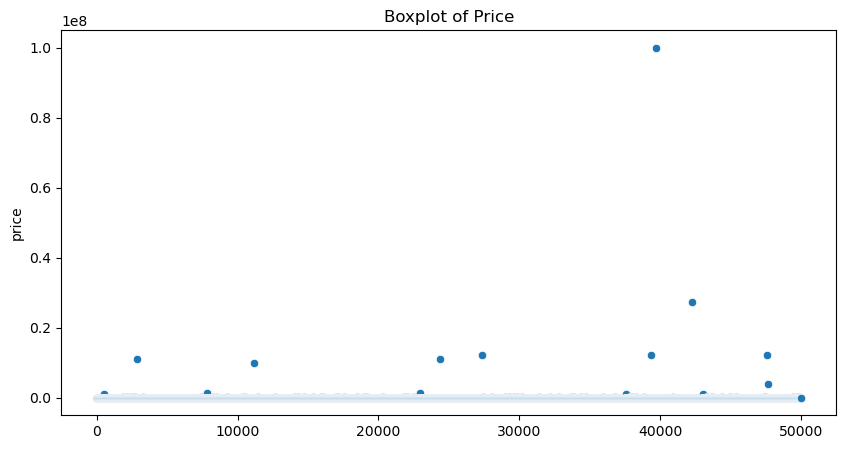

In [12]:
# Removing '$' from the price column and converting the data type to float from object
data['price'] = data['price'].astype(str)
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Checking for outliers in the price column
plt.figure(figsize=(10, 5))
sns.scatterplot(data['price'])
plt.title('Boxplot of Price')
plt.show()

We need to remove the outliers found in the data.